In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pickle

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [60]:
data = pd.read_csv('Predicting Medical Health Expenses - Full Material/med-insurance.csv')

In [61]:
data.shape

(1338, 7)

In [62]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



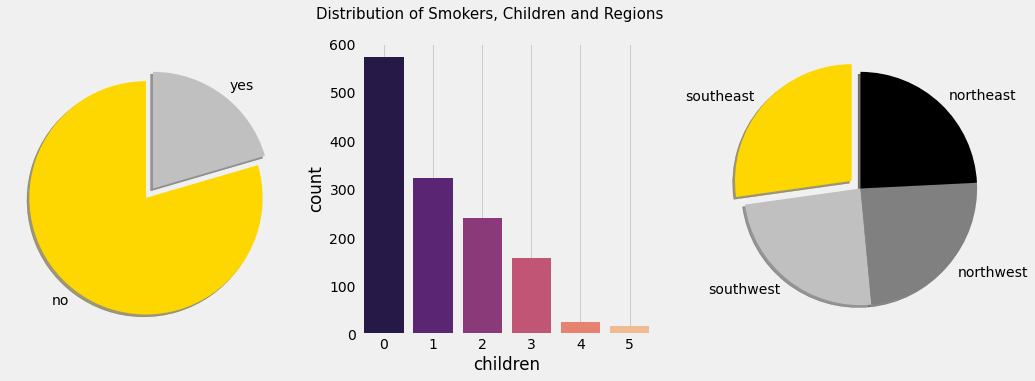

In [63]:
plt.subplot(1,3,1)
plt.pie(data['smoker'].value_counts().values,
       labels = data['smoker'].value_counts().index,
       colors = ['gold', 'silver'],
       startangle = 90,
       shadow = True,
       explode = [0.1, 0])

plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(data['region'].value_counts().values,
       labels = data['region'].value_counts().index,
       colors = ['gold', 'silver', 'grey', 'black'],
       startangle = 90,
       shadow = True,
       explode = [0.1, 0, 0, 0])
plt.suptitle('Distribution of Smokers, Children and Regions', fontsize = 15)
plt.show()

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



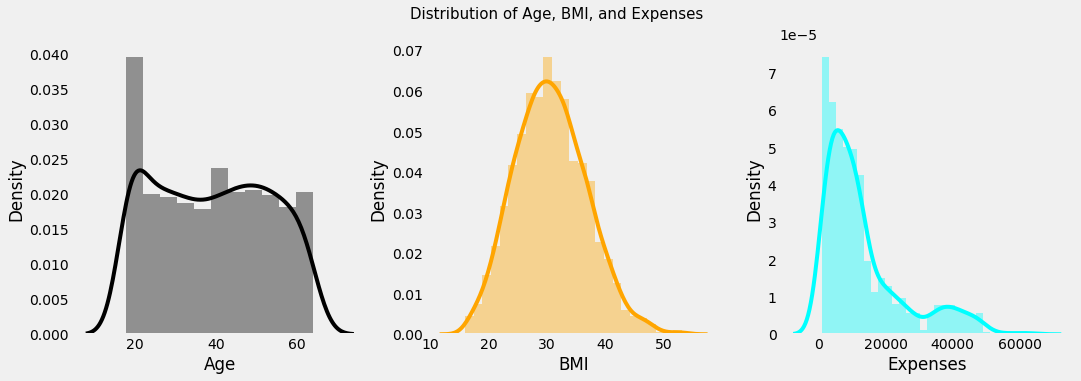

In [64]:
plt.subplot(1, 3, 1)
sns.distplot(data['age'], color= 'black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(data['bmi'], color = 'orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(data['expenses'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

In [65]:
import plotly.express as px
px.scatter(data, y ='expenses',
           x ='age',
           marginal_y ='violin',
           trendline ='ols')

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



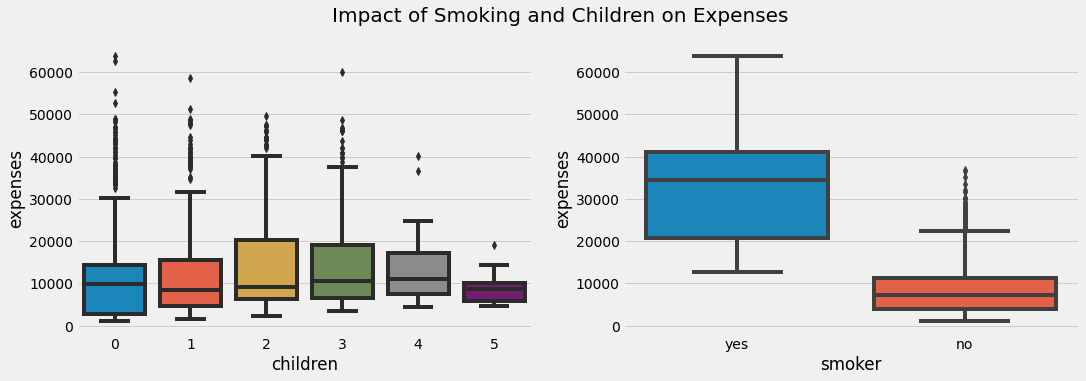

In [66]:
plt.subplot(1, 2 ,1)
sns.boxplot(data['children'], data['expenses'])

plt.subplot(1, 2, 2)
sns.boxplot(data['smoker'], data['expenses'])

plt.suptitle('Impact of Smoking and Children on Expenses', fontsize = 20)
plt.show()

In [67]:
px.scatter(data, x = 'expenses',
          y = 'age',
          facet_row = 'children',
          facet_col = 'region',
          color = 'smoker',
          trendline = 'ols')

In [68]:
px.scatter(data, x= 'expenses',
          y = 'bmi',
          facet_row = 'children',
          facet_col = 'region',
          color = 'smoker',
          trendline = 'ols')

In [69]:
px.scatter(data, 
                 x = 'expenses',
                 y = 'bmi',
                 size = 'age',
                 color = 'smoker',
          hover_name = 'expenses', size_max=15)

In [70]:
px.bar_polar(data, r='expenses', theta='region', color='sex', template='plotly_dark',
             color_discrete_sequence= px.colors.sequential.Plasma_r)

In [71]:
data[['expenses', 'region']].groupby(['region']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [72]:
data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [73]:
data['sex'] = data['sex'].replace(('male', 'female'), (2, 1))
data['smoker'] = data['smoker'].replace(('yes', 'no'), (2, 1))
data['region'] = data['region'].replace(('southeast', 'southwest', 'northeast', 'northwest'), (2, 1, 1, 1))

data.select_dtypes('object').columns

Index([], dtype='object')

In [74]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,1,21984.47
4,32,2,28.9,0,1,1,3866.86


In [75]:
y=data['expenses']
x=data.drop(['expenses'],axis = 1)

print(y.shape)
print(x.shape)
print(x.columns)

(1338,)
(1338, 6)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [76]:
print(x)
print(y)

      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       2       1
1      18    2  33.8         1       1       2
2      28    2  33.0         3       1       2
3      33    2  22.7         0       1       1
4      32    2  28.9         0       1       1
...   ...  ...   ...       ...     ...     ...
1333   50    2  31.0         3       1       1
1334   18    1  31.9         0       1       1
1335   18    1  36.9         0       1       2
1336   21    1  25.8         0       1       1
1337   61    1  29.1         0       2       1

[1338 rows x 6 columns]
0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .9, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 6)
(1205, 6)
(133,)
(1205,)


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
lr1=KNeighborsRegressor()

In [79]:
model= lr1.fit(x[['age', 'sex', 'bmi', 'children', 'smoker', 'region']],y)

In [80]:
model.score(x[['age', 'sex', 'bmi', 'children', 'smoker', 'region']],y)

0.4667637110414997

In [81]:
model.predict([[33,2,22,0,1,1]])

array([8275.098])

In [82]:
y_train_pred = lr1.predict(x_train)
y_test_pred = lr1.predict(x_test)

print(lr1.score(x_test,y_test))

0.47159685630369474


In [83]:
from sklearn.metrics import r2_score,mean_squared_error

In [84]:
print('MSE train data:' , mean_squared_error(y_train,y_train_pred))
print('MSE test data:' , mean_squared_error(y_test,y_test_pred))

print('R2 train data:', r2_score(y_train,y_train_pred))
print('R2 test data:' , r2_score(y_test,y_test_pred))

MSE train data: 107357737.34646578
MSE test data: 74917270.75060596
R2 train data: 0.42824275005626755
R2 test data: 0.47159685630369474


In [85]:
import pickle
with open('mainmodel.pickle','wb') as file:
    pickle.dump(model,file)

In [86]:
with open('mainmodel.pickle', 'rb') as file:
    model1 = pickle.load(file)

In [87]:
model1.predict([[33,2,22,0,1,1]])

array([8275.098])